# Exploratory Data Analysis and Visualization

In today's practice I will be looking into EDA and visualization, its workflow and best practices.This is going to be a series of continous practice and learning as I work on different ideas.

## EDA Workflow

Before I delve into today's practice, below are some of the EDA workflow

1. Build a DataFrame from the data (ideally, put all data in this object)
2. Clean the DataFrame. It should have the following properties
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore global properties. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore group properties. Use groupby and small multiples to compare subsets of the data.

## Effective EDA visualization

    1. Have graphical integrity
    2. Keep it simple
    3. Use the right display
    4. Use color sensibly
    
    
    
## A simple example on EDA viz.

How people feel about science.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
rcParams['figure.figsize'] = 6,5
sns.set_context("poster")
sns.set_style('whitegrid')

# The Interest in Science

Dataframe construction

In [2]:
science = {
    'interest': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
    'before': [19, 25, 40, 5, 11],
    'after': [38, 30, 14, 6, 12]
    }
science_df = pd.DataFrame.from_dict(science).set_index("interest")[['before', 'after']]
science_df

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


In [8]:
science_df = pd.DataFrame(science).set_index('interest')[['before', 'after']]
science_df

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


## Pie charts

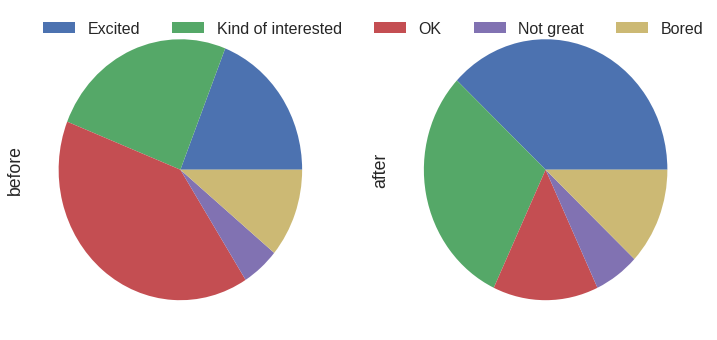

In [26]:
fig, axs = plt.subplots(1,2, figsize = (12,6))
science_df.before.plot(kind="pie", ax=axs[0], labels=None);
axs[0].legend(loc="upper left", ncol=5, labels=science_df.index)
science_df.after.plot(kind="pie", ax=axs[1], labels=None);

## Multiple bar chart

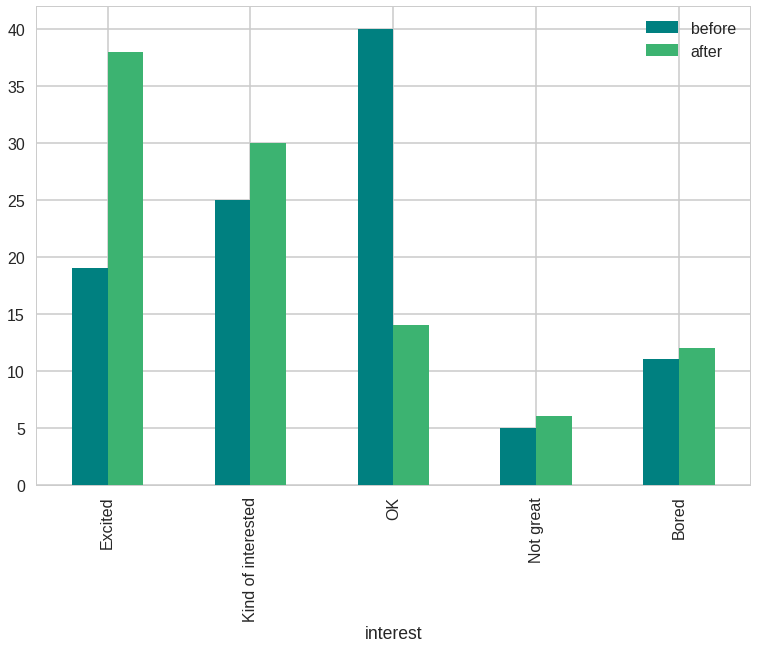

In [47]:
science_df.plot(kind = 'bar', color = ['teal', '#3CB371'])

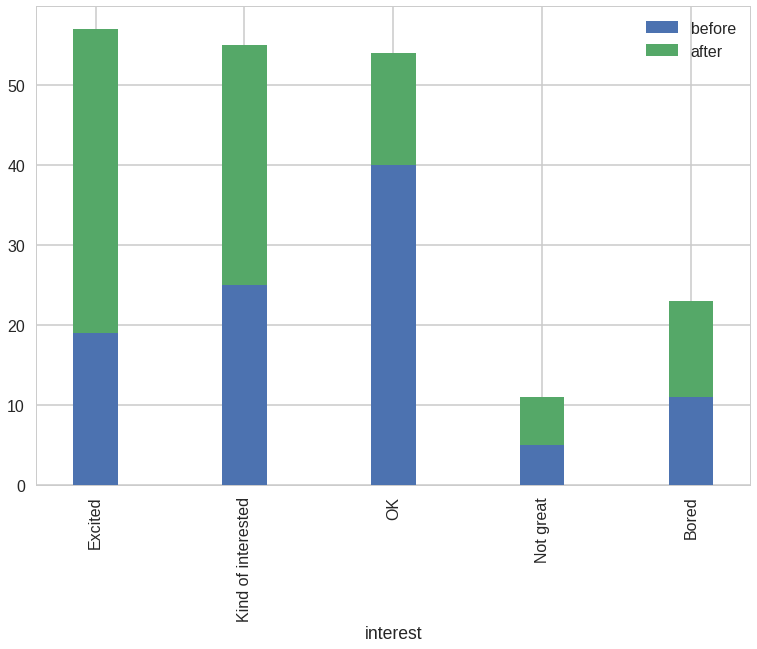

In [37]:
science_df.plot(kind = 'bar', width = 0.3, stacked = True)

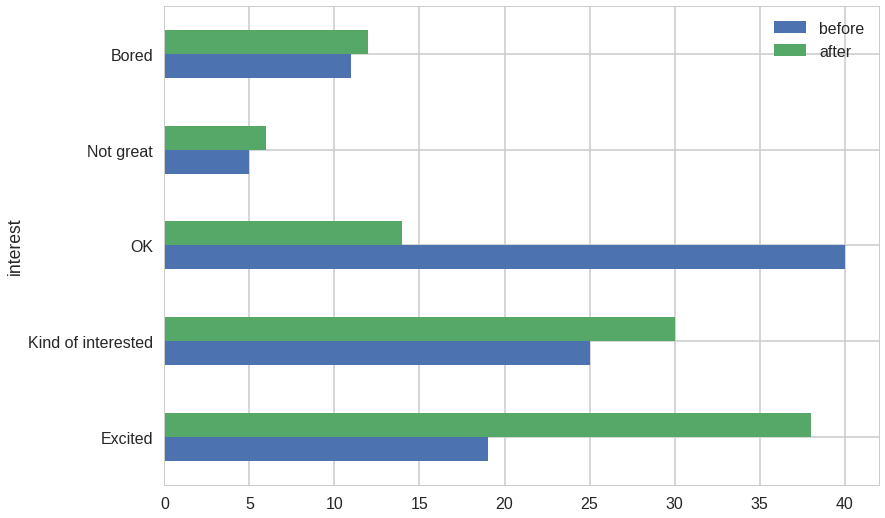

In [31]:
science_df.plot(kind = 'barh')

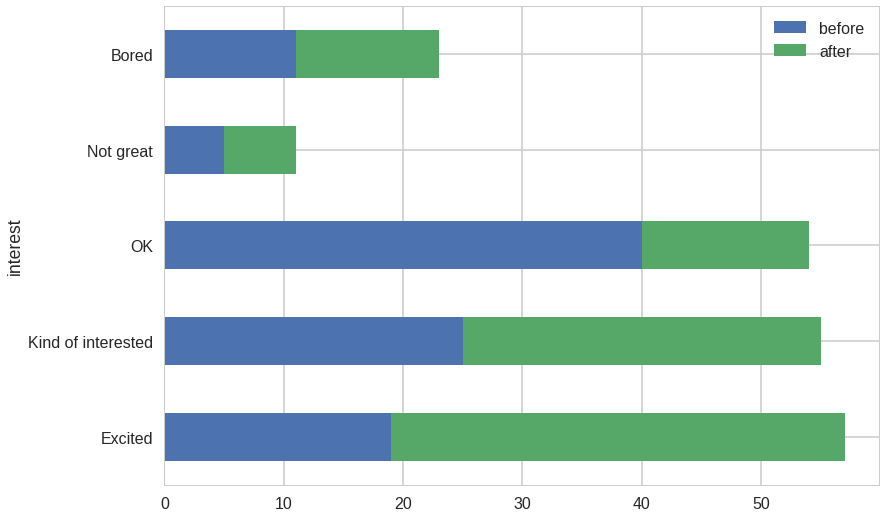

In [32]:
science_df.plot(kind = 'barh', stacked = True)

In [51]:
science_df

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


In [50]:
science_df.transpose()

interest,Excited,Kind of interested,OK,Not great,Bored
before,19,25,40,5,11
after,38,30,14,6,12


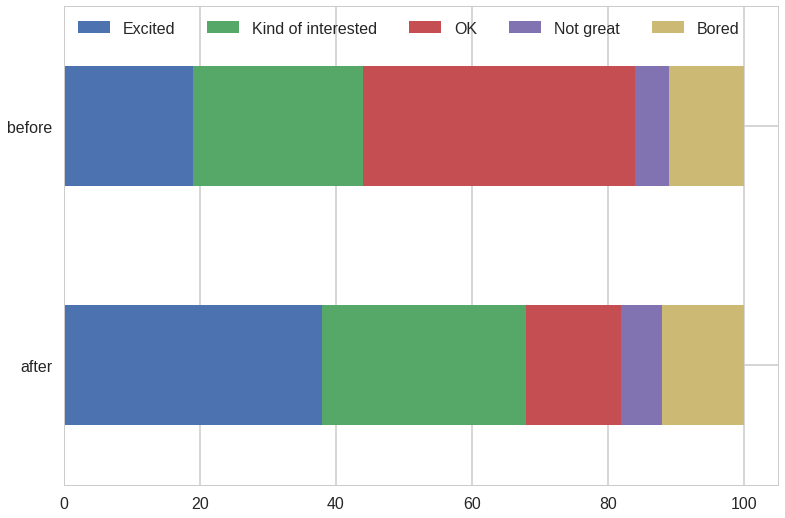

In [48]:
science_df.transpose().loc[['after', 'before'], :].plot(kind="barh", stacked=True)
plt.legend(loc=2, ncol=5);

## Difference bar chart

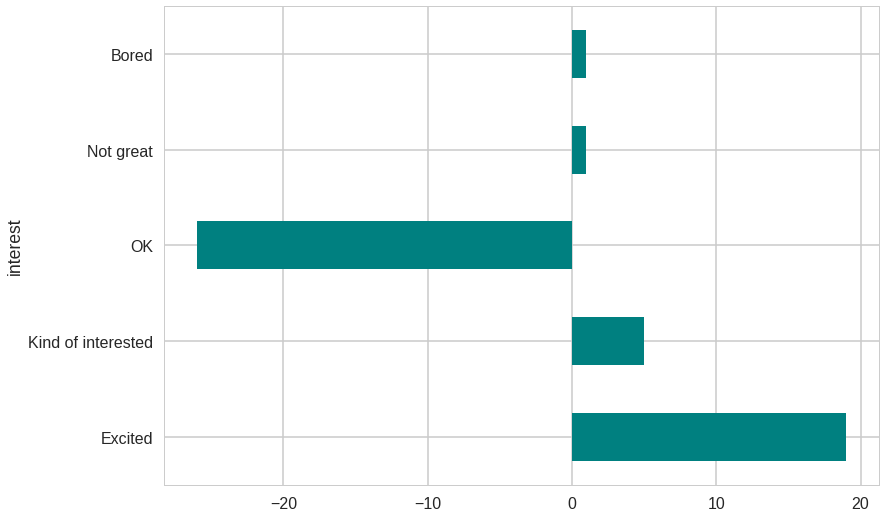

In [53]:
(science_df.after - science_df.before).plot(kind = 'barh', color = 'teal')

In [2]:
accident_data = pd.read_csv('Data/Accidents0514.csv', low_memory=False)
casualty_data = pd.read_csv('Data/Casualties0514.csv', low_memory=False)
vehicle_data = pd.read_csv('Data/Vehicles0514.csv', low_memory=False)
accident_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [3]:
accident_year = accident_data['Date'].apply(lambda s: int(s[-4:]))
accident_year.head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: Date, dtype: int64

In [3]:
accident_time = accident_data['Time']
accident_time.str.split(':')[:10][0:][:][0]

['17', '42']

In [4]:
accident_data_new = pd.concat([accident_data, accident_year], axis = 1)
accident_data_new.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1,1,2,2,0,0,1,1,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,5,4,1,1,0,0,1,1,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,4,1,1,0,0,1,1,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,1,1,1,0,0,1,1,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,7,1,2,0,0,1,1,E01002863,2005


In [5]:
accident_data_new.columns.values[9] = 'Date_Num'
accident_data_new.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date_Num,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1,1,2,2,0,0,1,1,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,5,4,1,1,0,0,1,1,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,4,1,1,0,0,1,1,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,1,1,1,0,0,1,1,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,7,1,2,0,0,1,1,E01002863,2005


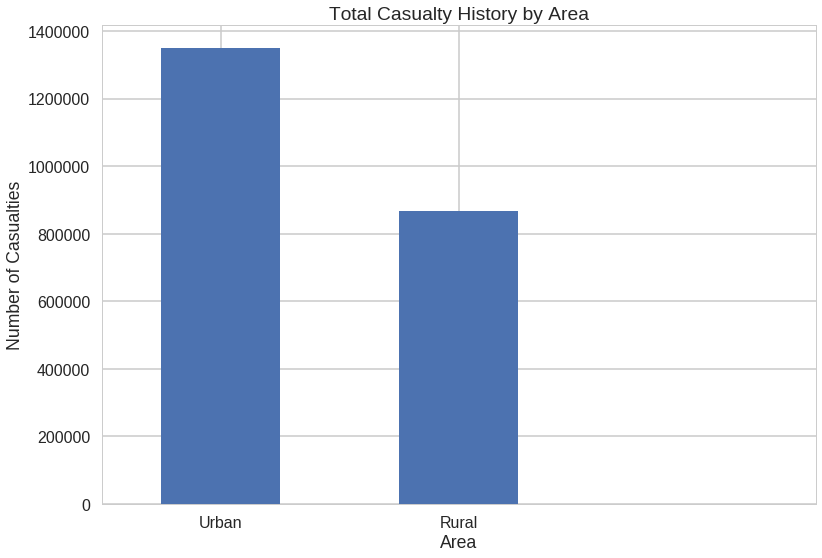

In [6]:
areaGroup = accident_data.groupby('Urban_or_Rural_Area', as_index=False).agg({"Number_of_Casualties": "sum"})
ax = areaGroup["Number_of_Casualties"].plot(kind="bar", title="Total Casualty History by Area")
plt.xticks(range(2), ["Urban", "Rural"], rotation=0)
ax.set_ylabel("Number of Casualties")
ax.set_xlabel("Area")

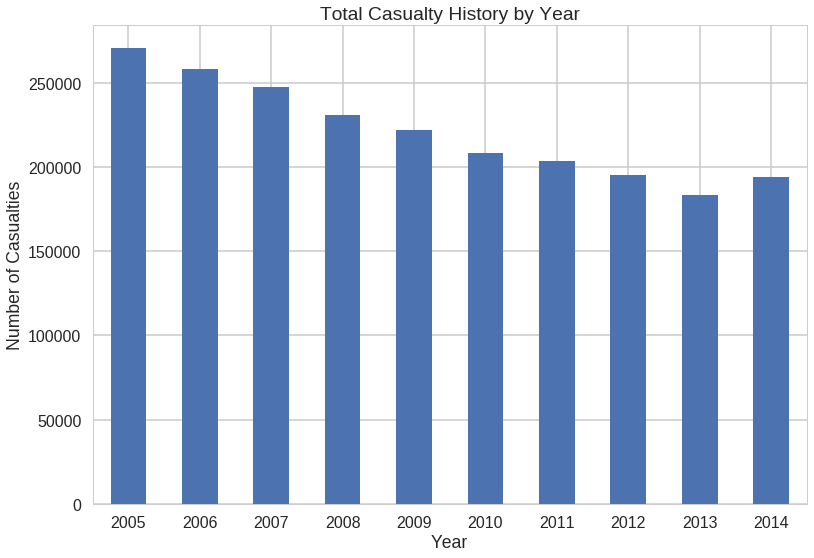

In [7]:
yearGroup = accident_data_new.groupby('Date', as_index=False).agg({"Number_of_Casualties": "sum"})
yearGroup
ax = yearGroup["Number_of_Casualties"].plot(kind="bar", title="Total Casualty History by Year")
plt.xticks(range(10), ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"], rotation=0)
ax.set_ylabel("Number of Casualties")
ax.set_xlabel("Year")

In [14]:
yearGroup

,Date,Number_of_Casualties
0,2005,271017
1,2006,258404
2,2007,247780
3,2008,230905
4,2009,222146
5,2010,208648
6,2011,203950
7,2012,195723
8,2013,183670
9,2014,194477


In [8]:
accidentGroup = accident_data_new.groupby(['Date', 'Accident_Severity']).agg({"Number_of_Casualties": "sum"})
accidentGroup

Number_of_Casualties
Date Accident_Severity                      
2005 1                                  5796
     2                                 38138
     3                                227083
2006 1                                  5680
     2                                 37880
     3                                214844
2007 1                                  5351
     2                                 36096
     3                                206333
2008 1                                  4398
     2                                 33987
     3                                192520
2009 1                                  3879
     2                                 32311
     3                                185956
2010 1                                  3256
     2                                 29418
     3                                175974
2011 1                                  3314
     2                                 29557
     3                                171079
2012 1                                  2938
     2                                 29591
     3                                163194
2013 1                                  2948
     2                                 27550
     3                                153172
2014 1                                  2898
     2                                 29024
     3                                162555

In [9]:
accidentGroup.unstack()


Number_of_Casualties               
Accident_Severity                    1      2       3
Date                                                 
2005                              5796  38138  227083
2006                              5680  37880  214844
2007                              5351  36096  206333
2008                              4398  33987  192520
2009                              3879  32311  185956
2010                              3256  29418  175974
2011                              3314  29557  171079
2012                              2938  29591  163194
2013                              2948  27550  153172
2014                              2898  29024  162555

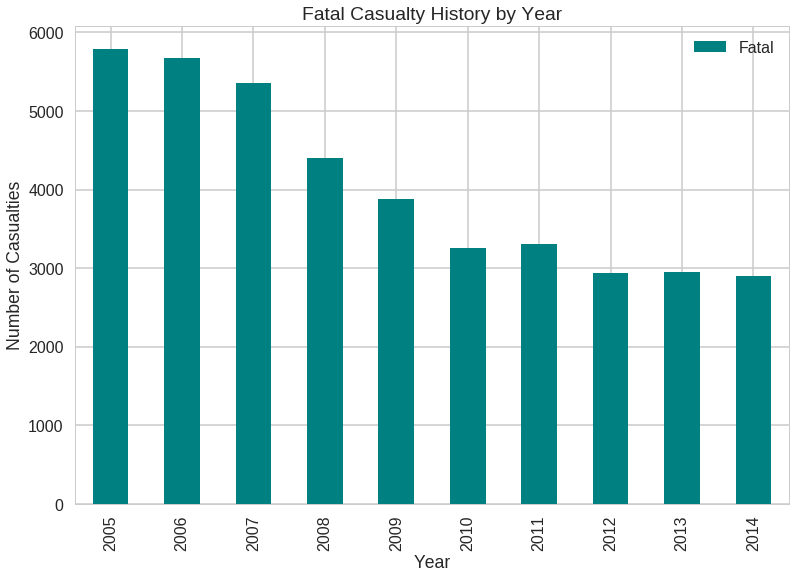

In [129]:
my_plot = accidentGroup.unstack(0)[0:-2]['Number_of_Casualties'].transpose().plot(kind = 'bar', stacked = False, title="Fatal Casualty History by Year", color ='teal')
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Year")
my_plot.legend(['Fatal'])

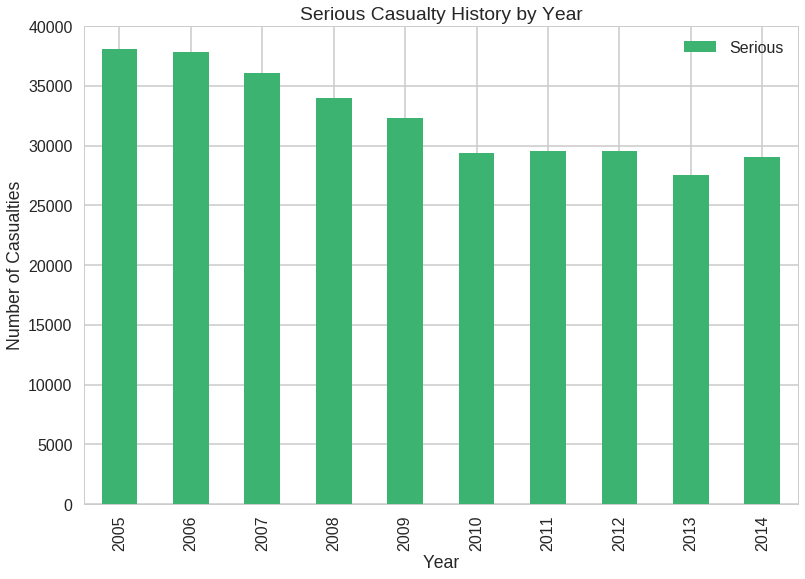

In [91]:
my_plot = accidentGroup.unstack(0)[1:-1]['Number_of_Casualties'].transpose().plot(kind = 'bar', stacked = False, title="Serious Casualty History by Year", color ='#3CB371')
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Year")
my_plot.legend(['Serious'])

In [105]:
accidentGroup.unstack(0)[2:]

Number_of_Casualties                                  \
Date                              2005    2006    2007    2008    2009   
Accident_Severity                                                        
3                               227083  214844  206333  192520  185956   

                                                           
Date                 2010    2011    2012    2013    2014  
Accident_Severity                                          
3                  175974  171079  163194  153172  162555

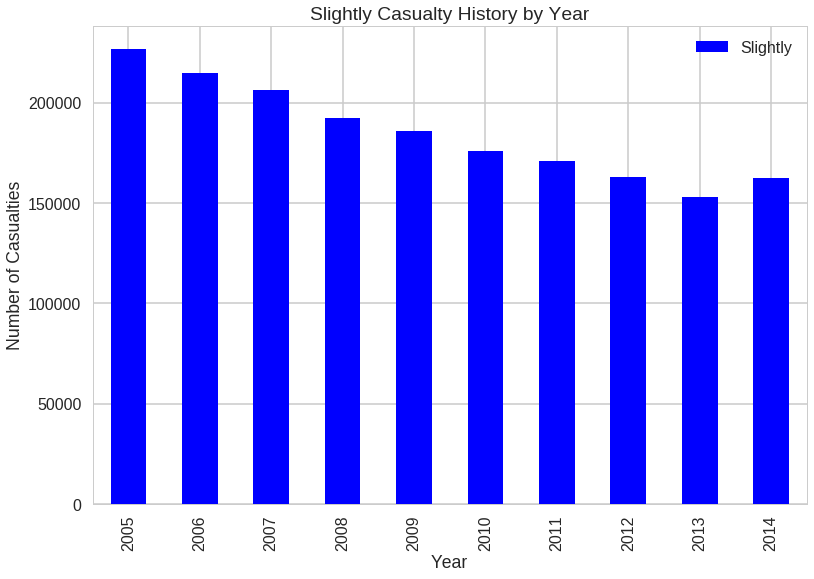

In [106]:
my_plot = accidentGroup.unstack(0)[2:]['Number_of_Casualties'].transpose().plot(kind = 'bar', stacked = False, title="Slightly Casualty History by Year", color ='blue')
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Year")
my_plot.legend(['Slightly'])

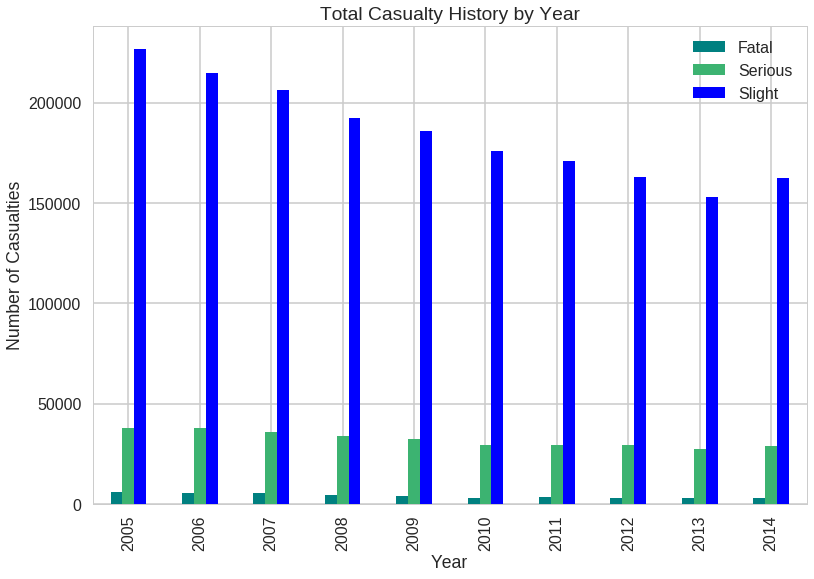

In [89]:
my_plot = accidentGroup.unstack().plot(kind='bar',stacked=False,title="Total Casualty History by Year", color =['teal', '#3CB371', 'blue'])
my_plot.set_ylabel("Number of Casualties")
my_plot.set_xlabel("Year")
my_plot.legend(['Fatal', 'Serious', 'Slight'])

In [189]:
timeGroup = accident_data_new.groupby('Time', as_index=False).agg({"Number_of_Casualties": "sum"})
timeGroup

,Time,Number_of_Casualties
0,00:01,3054
1,00:02,500
2,00:03,379
3,00:04,396
4,00:05,1942
5,00:06,292
6,00:07,269
7,00:08,423
8,00:09,324
9,00:10,2199


In [4]:
casualty_data.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [31]:
gender_counts = np.unique(casualty_data['Casualty_Severity'].replace(str('-1'), 'NaN', regex=True).values, return_counts=True)
gender_counts

(array([1, 2, 3]), array([  23072,  249410, 1944238]))

In [5]:
vehicle_data.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [9]:
accident_data.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1640592,2014984136414,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,0,0,6,3,3,0,0,2,1,NaN
1640593,2014984137514,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,0,0,6,1,3,0,0,2,1,NaN
1640594,2014984137714,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,0,0,4,1,4,0,0,2,1,NaN
1640595,2014984138414,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,0,0,6,2,2,0,0,2,1,NaN
1640596,2014984139614,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,24/12/2014,...,0,0,1,1,2,0,0,2,1,NaN
